Size: 500
[1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0
 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 

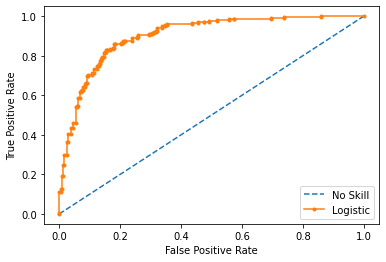

In [3]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
print("Size:",len(testy))
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
print(testy)
print("Size:",len(testy))
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()